In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pandas as pd
import seaborn as sea

## Gaia Magnitude diagram

In [2]:
Gaia_10pc = pd.read_csv("Gaia_10_arc_sec.csv")
Gaia_20pc = pd.read_csv("Gaia_20_arc_sec.csv")
Gaia_50pc = pd.read_csv("Gaia_50_arc_sec.csv")

In [3]:
Gaia_20pc.head()

,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,parallax
0,20.702248,22.190643,18.884672,50.000198
1,18.948711,19.630178,17.438574,50.006305
2,17.258026,20.512266,15.647074,50.008631
3,19.776623,18.969650,18.025637,50.011293
4,12.466857,14.018782,11.261345,50.015883


 The Gaia survey has recently released a data set for the parallaxes over over 1 billion
stars in the Milky Way Galaxy. Using data from the Gala public data website (https :
//gea.esac.esa.int/archive/).

make a color-magnitude diagram for stars that are less than 10 pc the Sun. See if you can
identify the main sequence, giant, and white dwarf regions in the figure. The following script
should help you get started downloading the Gaia data, </br>

    SELECT gaia.∗
    WHERE gaia.parallax > XX
    instead of gaia.∗
    gaia.phot g mean mag
    gaia.phot bp mean mag
    gaia.phot rp mean mag gaia.parallax

Repeat the same exercise for stars within 20 and 50 pc of the Sun. Explain the difference
between the CMD for 20 pc and 50 pc distance cuts.
Write out the steps that you took to make the figure (you don’t have to turn in any code that
you write)

In [4]:
full_Mag10 = Gaia_10pc.phot_g_mean_mag.values
full_BPRP10 = Gaia_10pc.phot_bp_mean_mag.values - Gaia_10pc.phot_rp_mean_mag
full_par10 = Gaia_10pc.parallax

full_Mag20 = Gaia_20pc.phot_g_mean_mag.values
full_BPRP20 = Gaia_20pc.phot_bp_mean_mag.values - Gaia_20pc.phot_rp_mean_mag
full_par20 = Gaia_20pc.parallax

full_Mag50 = Gaia_50pc.phot_g_mean_mag.values
full_BPRP50 = Gaia_50pc.phot_bp_mean_mag.values - Gaia_50pc.phot_rp_mean_mag
full_par50 = Gaia_50pc.parallax

In [5]:
Mag10 = []
Mag20 = []
Mag50 = []

BPRP10 = []
BPRP20 = []
BPRP50 = []

par10 = []
par20 = []
par50 = []

for i in range(len(Gaia_10pc)):
    if full_Mag10[i] > 16:
        pass
    else:
        Mag10.append(full_Mag10[i])
        BPRP10.append(full_BPRP10[i])
        par10.append(full_par10[i])
        
for i in range(len(Gaia_20pc)):
    if full_Mag20[i] > 16:
        pass
    else:
        Mag20.append(full_Mag20[i])
        BPRP20.append(full_BPRP20[i])
        par20.append(full_par20[i])
        
for i in range(len(Gaia_50pc)):
    if full_Mag50[i] > 16:
        pass
    else:
        Mag50.append(full_Mag50[i])
        BPRP50.append(full_BPRP50[i])
        par50.append(full_par50[i])

In [6]:
distance10 = np.abs(par10)/1000
colors10 = 1/distance10

distance20 = np.abs(par20)/1000
colors20 = 1/distance20

distance50 = np.abs(par50)/1000
colors50 = 1/distance50

In [7]:
cmap10 = []
cmap20 = []
cmap50 = []

for i in range(len(Mag10)):
    cmap10.append(colors10[i])
    
for i in range(len(Mag20)):
    cmap20.append(colors20[i])
    
for i in range(len(Mag50)):
    cmap50.append(colors50[i])

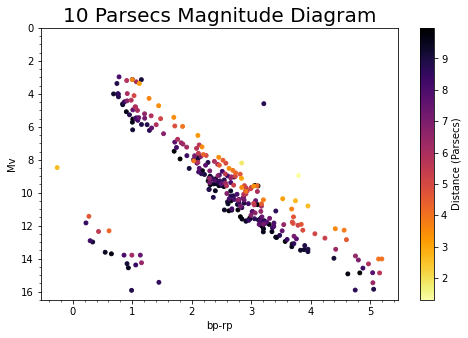

In [8]:
plt.figure(figsize = [8,5])
plt.title('10 Parsecs Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP10,Mag10, c = cmap10 , cmap = 'inferno_r',s=15)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.minorticks_on()
plt.ylim(16.5,0)
plt.xlabel('bp-rp')
plt.ylabel('Mv')

plt.show()
#plt.savefig("/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/HW1/10pc Color-mag Diagram")

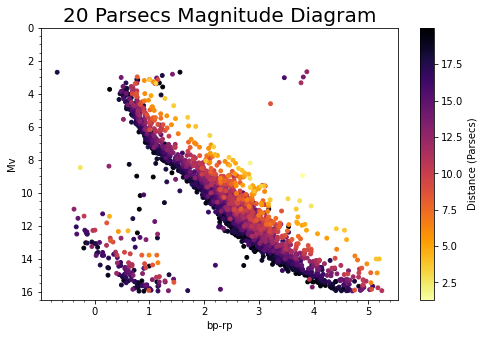

In [9]:
plt.figure(figsize = [8,5])
plt.title('20 Parsecs Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP20,Mag20, c = cmap20, cmap = 'inferno_r', s=15)
plt.minorticks_on()
plt.ylim(16.5,0)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.xlabel('bp-rp')
plt.ylabel('Mv')
#plt.xlim(6,-1)

plt.show()

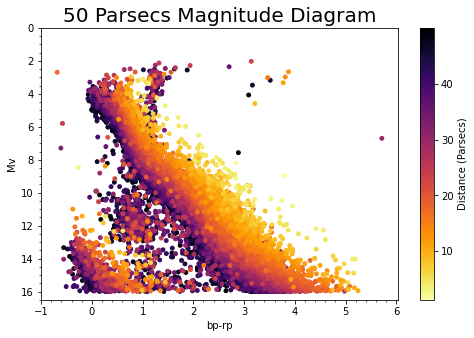

In [10]:
plt.figure(figsize = [8,5])
plt.title('50 Parsecs Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP50,Mag50, c = cmap50, cmap = 'inferno_r', s = 15)
plt.minorticks_on()
plt.ylim(16.5,0)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.xlabel('bp-rp')
plt.ylabel('Mv')

plt.show()
#plt.savefig("/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/HW1/50pc Color-mag Diagram")

## White Dwarfs

Using the Gaia DR2 catalog, identify the white dwarfs within 10 pc of the Sun. Assuming
that this sample is complete, what is the local density of white dwarfs? Identify as many white
dwarfs as you can within 20 pc and 50 pc. Make a histogram of the luminosity of white dwarfs
in each case. Can you make any conclusions about these histograms in the context of the class
discussion on the cooling rates of white dwarfs?

In [19]:
Gaia_10pc = pd.read_csv("Gaia_10_arc_sec_v2.csv")
Gaia_20pc = pd.read_csv("Gaia_20_arc_sec_v2.csv")
Gaia_50pc = pd.read_csv("Gaia_50_arc_sec_v2.csv")

In [21]:
full_Mag10 = Gaia_10pc.phot_g_mean_mag.values
full_BPRP10 = Gaia_10pc.bp_rp
full_par10 = Gaia_10pc.parallax
full_lum10 = Gaia_10pc.lum_val
full_temp10 = Gaia_10pc.teff_val
full_rad10 = Gaia_10pc.radius_val

full_Mag20 = Gaia_20pc.phot_g_mean_mag.values
full_BPRP20 = Gaia_20pc.bp_rp
full_par20 = Gaia_20pc.parallax
full_lum20 = Gaia_20pc.lum_val
full_temp20 = Gaia_20pc.teff_val
full_rad20 = Gaia_20pc.radius_val

full_Mag50 = Gaia_50pc.phot_g_mean_mag.values
full_BPRP50 = Gaia_50pc.bp_rp
full_par50 = Gaia_50pc.parallax
full_lum50 = Gaia_50pc.lum_val
full_temp50 = Gaia_50pc.teff_val
full_rad50 = Gaia_50pc.radius_val

In [22]:
Mag10,BPRP10,par10,lum10,temp10 = [],[],[],[],[]
Mag20,BPRP20,par20,lum20,temp20 = [],[],[],[],[]
Mag50,BPRP50,par50,lum50,temp50 = [],[],[],[],[]

for i in range(len(Gaia_10pc)):
    if full_Mag10[i] > 16:
        pass
    else:  
        Mag10.append(full_Mag10[i])
        BPRP10.append(full_BPRP10[i])
        par10.append(full_par10[i])
        lum10.append(full_lum10[i])
        temp10.append(full_temp10[i])
        
for i in range(len(Gaia_20pc)):
    if full_Mag20[i] > 16:
        pass
    else:  
        Mag20.append(full_Mag20[i])
        BPRP20.append(full_BPRP20[i])
        par20.append(full_par20[i])
        lum20.append(full_lum20[i])
        temp20.append(full_temp20[i])
        
for i in range(len(Gaia_50pc)):
    if full_Mag50[i] > 16:
        pass
    else:   
        Mag50.append(full_Mag50[i])
        BPRP50.append(full_BPRP50[i])
        par50.append(full_par50[i])
        lum50.append(full_lum50[i])
        temp50.append(full_temp50[i])

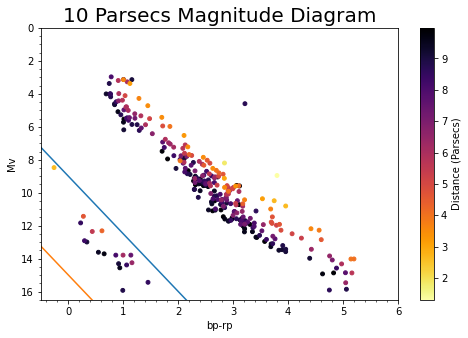

In [23]:
x = np.linspace(-1, 10, 1000)
y = 3.5*x+9
g = 3.5*x+15

plt.figure(figsize = [8,5])
plt.title('10 Parsecs Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP10,Mag10, c = cmap10 , cmap = 'inferno_r',s=15)
plt.plot(x,y)
plt.plot(x,g)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.minorticks_on()
plt.ylim(16.5,0)
plt.xlim(-.5,6)
plt.xlabel('bp-rp')
plt.ylabel('Mv')

plt.show()
#plt.savefig("/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/HW1/10pc Color-mag Diagram")

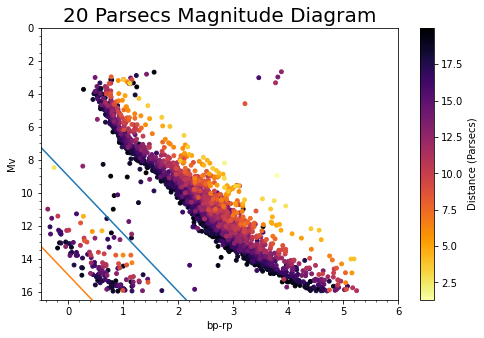

In [24]:
x = np.linspace(-3, 10, 1000)
y = 3.5*x+9
g = 3.5*x+15

plt.figure(figsize = [8,5])
plt.title('20 Parsecs Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP20,Mag20, c = cmap20, cmap = 'inferno_r', s=15)
plt.minorticks_on()
plt.plot(x,y)
plt.plot(x,g)
plt.ylim(16.5,0)
plt.xlim(-.5,6)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.xlabel('bp-rp')
plt.ylabel('Mv')
#plt.xlim(6,-1)

plt.show()
#plt.savefig("/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/HW1/20pc Color-mag Diagram")

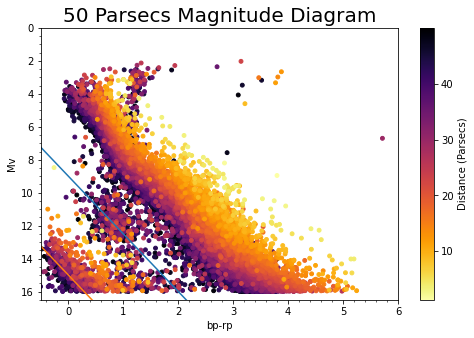

In [25]:
x = np.linspace(-3, 10, 1000)
y = 3.5*x+9
g = 3.5*x+15

plt.figure(figsize = [8,5])
plt.title('50 Parsecs Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP50,Mag50, c = cmap50, cmap = 'inferno_r', s = 15)
plt.plot(x,y)
plt.plot(x,g)
plt.xlim(-.5,6)
plt.minorticks_on()
plt.ylim(16.5,0)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.xlabel('bp-rp')
plt.ylabel('Mv')

plt.show()
#plt.savefig("/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/HW1/50pc Color-mag Diagram")

There are only a total of 18 White dwarfs within 10 parsecs of us. So with a total of 285 stars within this range, that leaves us with a white dwarf density of: 0.0632


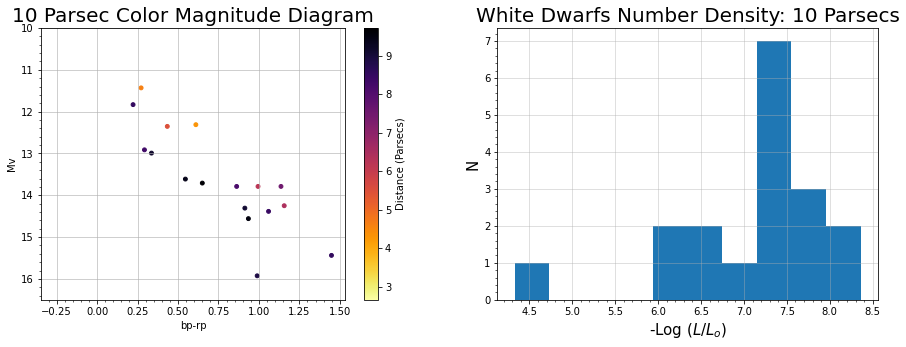

In [27]:
Mag_WD10 = []
BPRP_WD10 = []
cmap10 = []
lum_WD10 = []

y = 3.5*x+9
g = 3.5*x+15
for i in range(len(Mag10)):
    if (Mag10[i] >3.5*BPRP10[i] +9) & (Mag10[i] < 3.5*BPRP10[i] + 15):
        Mag_WD10.append(Mag10[i])
        BPRP_WD10.append(BPRP10[i])
        distance10 = np.abs(par10)/1000
        colors10 = 1/distance10
        cmap10.append(colors10[i])
        
        abs_mag = Mag10[i] + 5-5*np.log10(distance10[i])   #Equation 1
        
        lum_bright = 10**(-(abs_mag - 4.77)/2.5)    #Equation 2
        lum_WD10.append(lum_bright)
        
print("There are only a total of " +str(len(Mag_WD10)) + " White dwarfs within 10 parsecs of us." +
      " So with a total of " +str(len(Mag10)) +" stars within this range, that leaves us with" +
      " a white dwarf density of: " + str(round(len(Mag_WD10)/len(Mag10),4)))

plt.figure(figsize = [15,5])
plt.subplot(121)
plt.title('10 Parsec Color Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP_WD10,Mag_WD10, c = cmap10 , cmap = 'inferno_r',s=15)
plt.grid(alpha = .75)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.minorticks_on()
plt.ylim(16.5,10)
plt.xlabel('bp-rp')
plt.ylabel('Mv')

plt.subplot(122)
plt.hist(-np.log10(lum_WD10))
plt.title('White Dwarfs Number Density: 10 Parsecs', fontsize = 20)
plt.grid(alpha = .5)
plt.minorticks_on()
plt.ylabel('N', fontsize = 15)
plt.xlabel(r'-Log $(L/L_o)$', fontsize = 15)

plt.show()

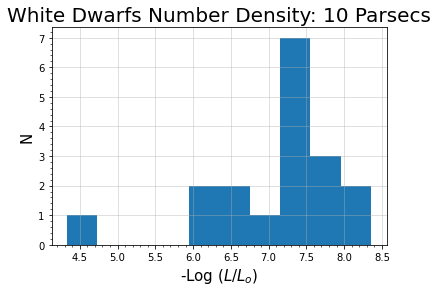

In [29]:
plt.hist(-np.log10(lum_WD10))
plt.title('White Dwarfs Number Density: 10 Parsecs', fontsize = 20)
plt.grid(alpha = .5)
plt.minorticks_on()
plt.ylabel('N', fontsize = 15)
plt.xlabel(r'-Log $(L/L_o)$', fontsize = 15)

#plt.savefig("/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/HW4/10pc WD Density")
plt.show()

There are only a total of 135 White dwarfs within 20 parsecs of us. So with a total of 2395 stars within this range, 
that leaves us with a white dwarf density of: 0.0564


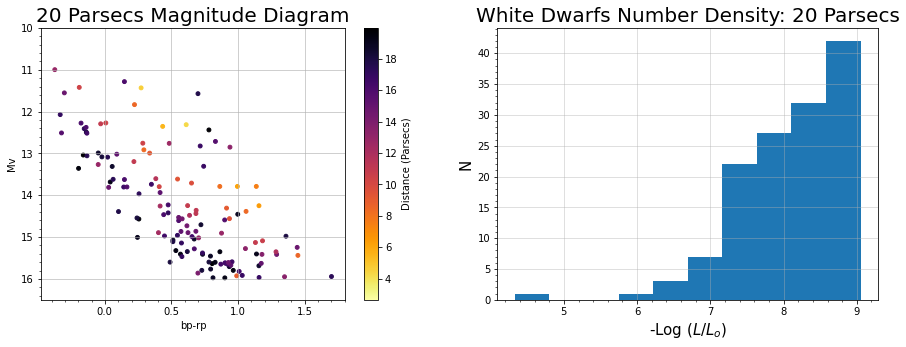

In [30]:
Mag_WD20 = []
BPRP_WD20 = []
cmap20 = []
lum_WD20 = []

for i in range(len(Mag20)):
    if (Mag20[i] >3.5*BPRP20[i] +9) & (Mag20[i] < 3.5*BPRP20[i] + 15):
        Mag_WD20.append(Mag20[i])
        BPRP_WD20.append(BPRP20[i])
        distance20 = np.abs(par20)/1000
        colors20 = 1/distance20
        cmap20.append(colors20[i])
        
        abs_mag = Mag20[i] + 5-5*np.log10(distance20[i])   #Equation 1
        
        lum_bright = 10**(-(abs_mag - 4.77)/2.5)    #Equation 2
        lum_WD20.append(lum_bright)
        
print("There are only a total of " +str(len(Mag_WD20)) + " White dwarfs within 20 parsecs of us." +
      " So with a total of " +str(len(Mag20)) +" stars within this range, ")
print("that leaves us with" +
      " a white dwarf density of: " + str(round(len(Mag_WD20)/len(Mag20),4)))

plt.figure(figsize = [15,5])
plt.subplot(121)
plt.title('20 Parsecs Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP_WD20,Mag_WD20, c = cmap20 , cmap = 'inferno_r',s=15)
plt.grid(alpha = .75)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.minorticks_on()
plt.ylim(16.5,10)
plt.xlabel('bp-rp')
plt.ylabel('Mv')

plt.subplot(122)
plt.hist(-np.log10(lum_WD20))
plt.title('White Dwarfs Number Density: 20 Parsecs', fontsize = 20)
plt.grid(alpha = .5)
plt.minorticks_on()
plt.ylabel('N', fontsize = 15)
plt.xlabel(r'-Log $(L/L_o)$', fontsize = 15)

plt.show()

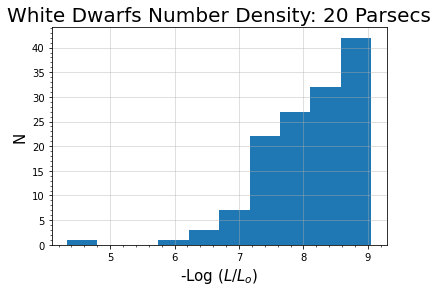

In [31]:
plt.hist(-np.log10(lum_WD20))
plt.title('White Dwarfs Number Density: 20 Parsecs', fontsize = 20)
plt.grid(alpha = .5)
plt.minorticks_on()
plt.ylabel('N', fontsize = 15)
plt.xlabel(r'-Log $(L/L_o)$', fontsize = 15)

#plt.savefig("/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/HW4/20pc WD Density")
plt.show()

There are only a total of 817 White dwarfs within 50 parsecs of us. So with a total of 33383 stars within this range, 
that leaves us with a white dwarf density of: 0.0245


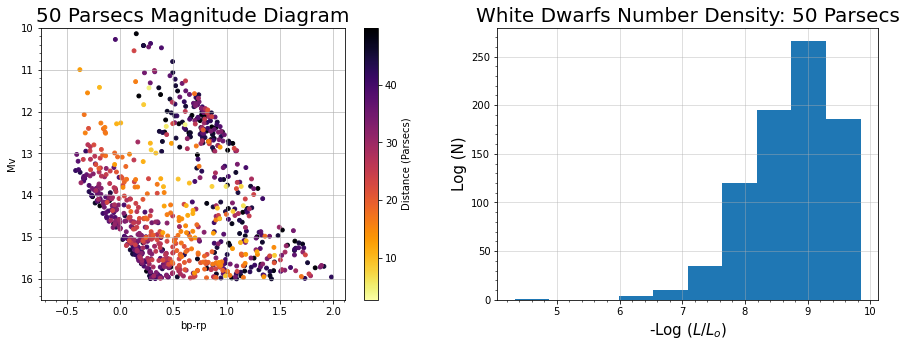

In [32]:
Mag_WD50 = []
BPRP_WD50 = []
cmap50 = []
lum_WD50 = []

for i in range(len(Mag50)):
    if (Mag50[i] >3.5*BPRP50[i] +9) & (Mag50[i] < 3.5*BPRP50[i] + 15):
        Mag_WD50.append(Mag50[i])
        BPRP_WD50.append(BPRP50[i])
        distance50 = np.abs(par50)/1000
        colors50 = 1/distance50
        cmap50.append(colors50[i])
        
        abs_mag = Mag50[i] + 5-5*np.log10(distance50[i])   #Equation 1
        
        lum_bright = 10**(-(abs_mag - 4.77)/2.5)    #Equation 2
        lum_WD50.append(lum_bright)
        
print("There are only a total of " +str(len(Mag_WD50)) + " White dwarfs within 50 parsecs of us." +
      " So with a total of " +str(len(Mag50)) +" stars within this range, ")
print("that leaves us with" +
      " a white dwarf density of: " + str(round(len(Mag_WD50)/len(Mag50),4)))

plt.figure(figsize = [15,5])
plt.subplot(121)
plt.title('50 Parsecs Magnitude Diagram', fontsize = 20)
plt.scatter(BPRP_WD50,Mag_WD50, c = cmap50 , cmap = 'inferno_r',s=15)
plt.grid(alpha = .75)
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.minorticks_on()
plt.ylim(16.5,10)
plt.xlabel('bp-rp')
plt.ylabel('Mv')

plt.subplot(122)
plt.hist(-np.log10(lum_WD50))
plt.title('White Dwarfs Number Density: 50 Parsecs', fontsize = 20)
plt.grid(alpha = .5)
plt.minorticks_on()
plt.ylabel('Log (N)', fontsize = 15)
plt.xlabel(r'-Log $(L/L_o)$', fontsize = 15)

plt.show()

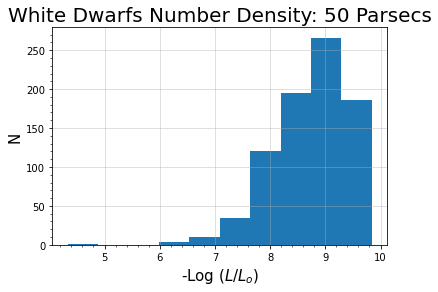

In [33]:
plt.hist(-np.log10(lum_WD50))
plt.title('White Dwarfs Number Density: 50 Parsecs', fontsize = 20)
plt.grid(alpha = .5)
plt.minorticks_on()
plt.ylabel('N', fontsize = 15)
plt.xlabel(r'-Log $(L/L_o)$', fontsize = 15)

#plt.savefig("/Users/fmart/Google Drive/Semesters/Fall 2020/ASTR 401/HW4/50pc WD Density")
plt.show()